In [43]:
import pandas as pd
data=pd.read_csv('titanic.csv')

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
#data preprocessing
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data['Age']=data['Age'].fillna(data['Age'].median())
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
data['Cabin']=data['Cabin'].fillna("Unknown")
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [48]:
data.drop("Cabin",axis=1,inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [49]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [51]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data=pd.get_dummies(data,columns=['Embarked'],drop_first=True)

In [53]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])

In [55]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8100558659217877


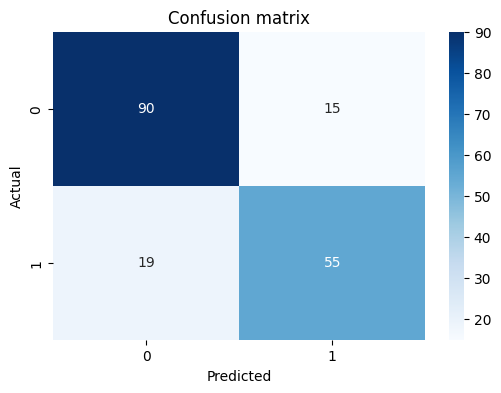

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d', cmap = 'Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model= DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train,y_train)
dt_y_pred=dt_model.predict(X_test)
print("desicision tree accuracy:",accuracy_score(y_test,dt_y_pred))

desicision tree accuracy: 0.7877094972067039


In [67]:
print("depth of the descision tree:",dt_model.get_depth())

depth of the descision tree: 21


In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
feature_importances=rf_model.feature_importances_
feature_df=pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':feature_importances
})
feature_df=feature_df.sort_values(by='Importance',ascending=False)
print(feature_df)

      Feature  Importance
5        Fare    0.273568
1         Sex    0.268369
2         Age    0.253454
0      Pclass    0.080003
3       SibSp    0.054522
4       Parch    0.037680
7  Embarked_S    0.022740
6  Embarked_Q    0.009663


In [76]:
from sklearn.svm import SVC
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_test)
svm_model=SVC(kernel='rbf',random_state=42)
svm_model.fit(X_train_scaled,y_train)
svm_y_pred=svm_model.predict(X_val_scaled)
print('SVM Accuracy:',accuracy_score(y_test,svm_y_pred))

SVM Accuracy: 0.8212290502793296


In [77]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict and calculate accuracy
y_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

# Input processing for predictions
import pandas as pd

single_input = pd.DataFrame({
    'Pclass': [3],    # Passenger Class
    'Sex': ['male'],  # Gender
    'Age': [22.0],    # Age
    'SibSp': [1],     # Siblings/Spouses aboard
    'Parch': [0],     # Parents/Children aboard
    'Fare': [7.25],   # Fare paid
    'Embarked': ['S'] # Port of Embarkation
})

# Preprocess the input
single_input['Sex'] = single_input['Sex'].map({'male': 0, 'female': 1})  # Encode 'Sex'
single_input = pd.get_dummies(single_input, columns=['Embarked'], drop_first=True)

# Ensure all expected columns are present
expected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
for col in expected_columns:
    if col not in single_input.columns:
        single_input[col] = 0  # Add missing columns with 0

# Reorder columns to match the training data
single_input = single_input[expected_columns]

# Predict the outcome for the single input
single_input_scaled = scaler.transform(single_input)
prediction = svm_model.predict(single_input_scaled)
print("Prediction for single input:", prediction)

SVM Accuracy: 0.8212290502793296
Prediction for single input: [0]
